In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from filaments.plot import *
from filaments.processing import *

# Statistical study of anomalies - South China Sea

In [7]:
path = "../../data/CAL/"

In [25]:
chlorophyll = xr.open_dataset(path + "MODIS_chl_extended_8D.nc").chlor_a

chl_anomalies = xr.open_dataset(path + "MODIS_chl_anomalies_8D.nc").chlor_a

chl_deviation = chlorophyll.assign_coords(day_of_year = chlorophyll.time.dt.strftime("%d-%m")).groupby("day_of_year") \
                - chlorophyll.assign_coords(day_of_year = chlorophyll.time.dt.strftime("%d-%m")).groupby("day_of_year").mean("time")

bathy = xr.open_dataset(path + "bathymetry_interpolated.nc")

bathymetry_coast = bathy.where((bathy.elevation >= -1000)).elevation.to_numpy()

lons, lats = chlorophyll.lon, chlorophyll.lat

In [28]:
lon_min = -127.025
lon_max = -127.025
lat_min = 36.
lat_max = 40.

# Distribution of chlorophyll values

Text(0.5, 0, 'Deviation from climatology [mg/m$^3$]')

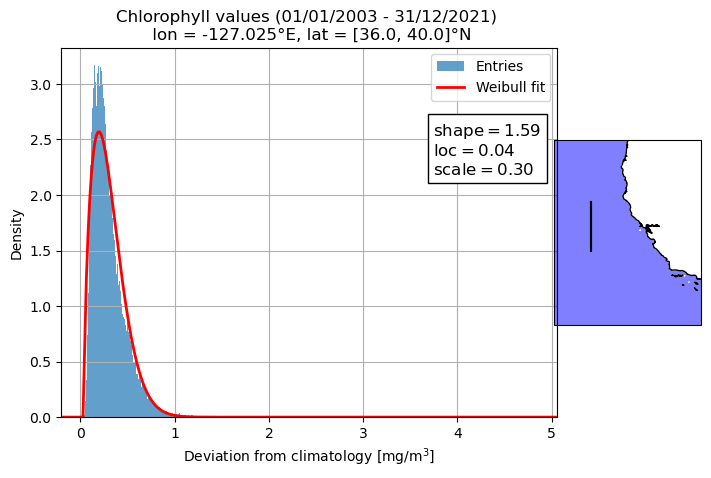

In [22]:
fig, ax = plot_histogram(chlorophyll, [lon_min, lon_max], [lat_min, lat_max], region = True, fit_func=weibull_min)

title = "Chlorophyll values (01/01/2003 - 31/12/2021) \n lon = %s°E, lat = %s°N" \
        %(lon_min, [lat_min, lat_max])

ax.set_title(title)
ax.set_xlabel("Deviation from climatology [mg/m$^3$]")

# Distribution of deviations from climatology

c:\Users\feder\miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Text(0.5, 0, 'Deviation from climatology [mg/m$^3$]')

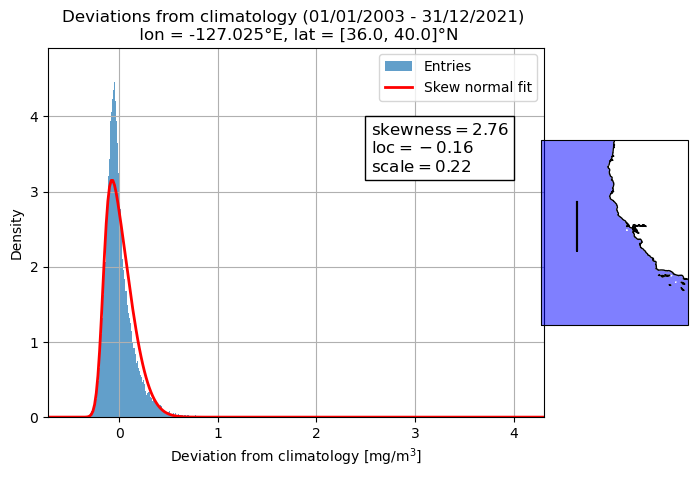

In [26]:
fig, ax = plot_histogram(chl_deviation, [lon_min, lon_max], [lat_min, lat_max], region = True, fit_func=skewnorm)

title = "Deviations from climatology (01/01/2003 - 31/12/2021) \n lon = %s°E, lat = %s°N" \
        %(lon_min, [lat_min, lat_max])

ax.set_title(title)

ax.set_xlabel("Deviation from climatology [mg/m$^3$]")

# Distributions of anomalies

Text(0.5, 0, 'Standardized anomalies')

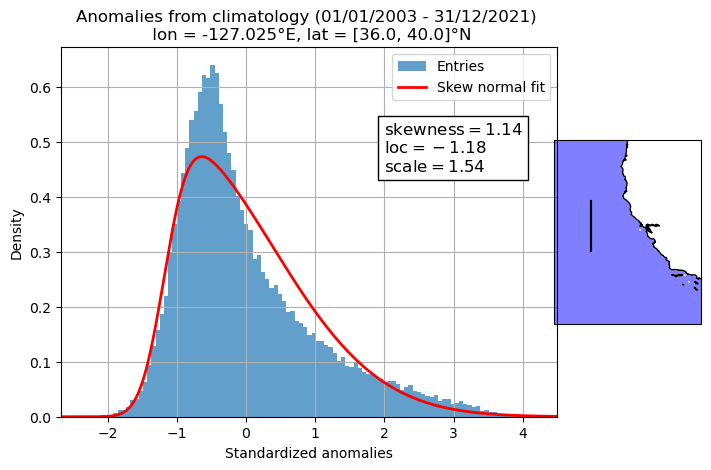

In [29]:
fig, ax = plot_histogram(chl_anomalies, [lon_min, lon_max], [lat_min, lat_max], region = True, fit_func=skewnorm)

title = "Anomalies from climatology (01/01/2003 - 31/12/2021) \n lon = %s°E, lat = %s°N" \
        %(lon_min, [lat_min, lat_max])

ax.set_title(title)

ax.set_xlabel("Standardized anomalies")